 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>═══════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Section 5. Matplotlib을 통한 시각화 기초

### _Objective_
1. 데이터 시각화는 분석결과를 쉽게 이해할 수 있도록 표현하고 전달하는데 중요한 역할을 합니다.<br>
2. 데이터 시각화에 필수적인 Matplotlib의 기본 요소들을 배워봅니다.<br>
3. 더욱 명확하고 효과적진 전달을 위한 Matplotlib의 여러 요소들을 배워봅니다.<br>
  
╚════════════════════════════════════════╝

In [0]:
%matplotlib inline
# Jupyter 환경에서 Cell의 Output으로 시각화 결과를 바로 출력하도록 설정합니다.

import matplotlib.pyplot as plt
# matplotlib.pyplot : 시각화에 유용한 Method 들이 있는 Package
import numpy as np

### [Optional. 시각화에서 한글 사용하기]

---

> _`matplotlib` 패키지는 기본적으로 한글을 지원하지 않습니다._<br> 
> _만약 `matplotlib`에서 폰트설정 없이 한글을 사용하려 한다면 글자가 깨져서 알수 없는 문자가 출력될 것입니다._<br>
> _한글로 시각화를 하기 위해서는 아래와 같은 순서로 한글 폰트를 설치 후 세팅하는 작업이 필요합니다._

In [0]:
# 1. 나눔 폰트를 다운받기
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
import matplotlib.font_manager as fm
# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# \[ I. Matplotlib의 구조 \]

---

---

> _`matplotlib.pyplot`은_
> 1. _시각화 전반의 정보를 담당하는 figure,_ <br>
> 2. _우리가 그리고자 하는 도형인 plot,_<br>
> 3. _이 것들을 꾸며주는 customize_<br>

> _로 나뉘어집니다._<br>

> _단계 별로 적용하면서, 구조가 어떻게 되는지 확인해 보도록 하겠습니다._

## 예제 데이터 )  학생의 시험 성적 추이

#### 데이터 ) 학생의 중학교 기간, 국영수 내신 성적 추이
`scores`

|과목| 1-1학기 중간 | 1-1학기 기말 | 1-2학기 중간 | 1-2학기 기말 | 2-1학기 중간 | 2-1학기 기말 | 2-2학기 중간 | 2-2학기 기말 |  3-1학기 중간 | 3-1학기 기말 | 3-2학기 중간 | 3-2학기 기말 |  
|---|--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |
|국어| 83 | 85 | 84 | 81 | 80 | 85 | 84 | 81 | 79 | 75 | 76 | 74 |
|영어| 86 | 90 | 91 | 89 | 92 | 90 | 87 | 85 | 87 | 84 | 82 | 80 |
|수학| 73 | 78 | 82 | 87 | 92 | 96 | 95 | 93 | 94 | 96 | 97 | 98 |

In [0]:
scores = np.array([
    [83, 85, 84, 81, 80, 85, 84, 81, 79, 75, 76, 74],
    [86, 90, 91, 89, 92, 90, 87, 85, 87, 84, 82, 80],
    [73, 78, 82, 87, 92, 96, 95, 93, 94, 96, 97, 98]])

## 1. 기본 Plot 그리기

---


`plt.plot`은 변수의 추이를 확인할 수 있는 시각화 방식입니다. 전 기간의 학생 국어 성적 추이를 확인해 보도록 하겠습니다.

> 1. plt.figure() : 시각화를 표현할 공간(객체)을 생성합니다.(캔버스 만들기)
> 2. plt.plot() : 생성된 공간(객체)에 데이터를 시각화하여 그려줍니다.(캔버스에 그림그리기)
> 3. plt.show() : 그려진 시각화를 출력합니다.(캔버스에 그린 그림 전시하기)

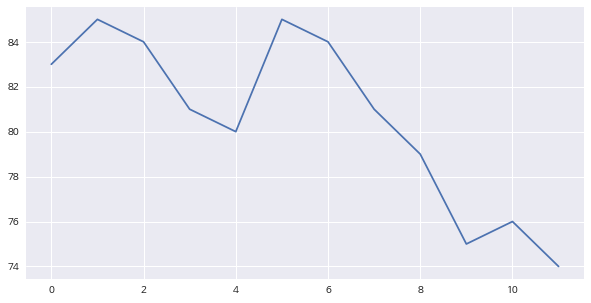

In [54]:
lang_score = scores[0] # 국어 성적만 가져와 저장합니다.

fig = plt.figure(figsize=(10, 5)) # 시각화에 관련된 모든 정보를 총괄하는 Figure 객체

plt.plot(lang_score) # 국어 성적을 그립니다.
                     # X 축 : 데이터의 순서 ( Index )
                     # Y 축 : 데이터의 값 ( Value )

plt.show() # 그려진 Plot을 출력합니다.

## 2. Plot의 제목 추가하기

---

위의 plot에 제목을 달아보도록 하겠습니다.

> 1. plt.title(" ") : plot 위에 제목 추가

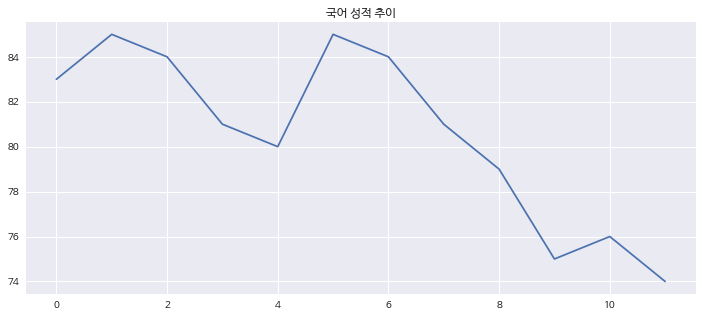

In [31]:
lang_score = scores[0]

fig = plt.figure(figsize=(12, 5))

plt.plot(lang_score) 

plt.title("국어 성적 추이") # Plot에 제목을 달아줍니다.

plt.show()

## 3. x 축 라벨 바꾸기 

---

현재 위의 x축은 0,2,4,6,8,10 같은 숫자로 표기되어 있습니다.<br>
의미에 맞게 "1-1학기 중간"같은 문자로 바꾸어 보도록 하겠습니다.<br>

> 1. 원하는 Label 을 변수에 저장
> 2. `plt.plot("xlabel", "ylabel", data=obj)` <br>
> x축 라벨 넘겨주기

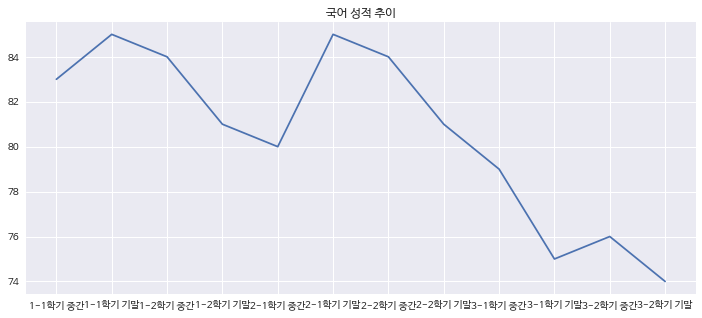

In [25]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"] # x축 라벨 지정하여 변수에 저장합니다.

lang_score = scores[0] 

fig = plt.figure(figsize=(12, 5)) 

plt.plot(xs, lang_score) # plot을 그릴때, x축 라벨 넘겨줍니다.

plt.title("국어 성적 추이")

plt.show()

## 4. 축 이름 달기

---

위의 plot에 x축 y축에 맞춰 각각 시간, 성적을 달아보도록 하겠습니다.

> 1. `plt.xlabel("xlabel")` : x축에 이름을 달아줍니다.
> 2. `plt.ylabel("ylabel")` : y축에 이름을 달아줍니다.

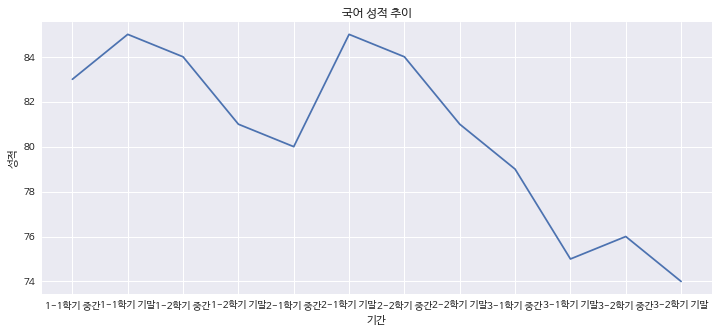

In [29]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0]

fig = plt.figure(figsize=(12, 5)) 

plt.plot(xs, lang_score)

plt.title("국어 성적 추이")
plt.xlabel("기간") # x 축에 "기간" 이라는 이름을 붙여줍니다.
plt.ylabel("성적") # y 축에 "성적" 이라는 이름을 붙여줍니다.
plt.show()

## 5. plot에 새로운 plot 추가하기

---

국어 외에도 수학 성적을 함께 추가해보도록 하겠습니다.

 

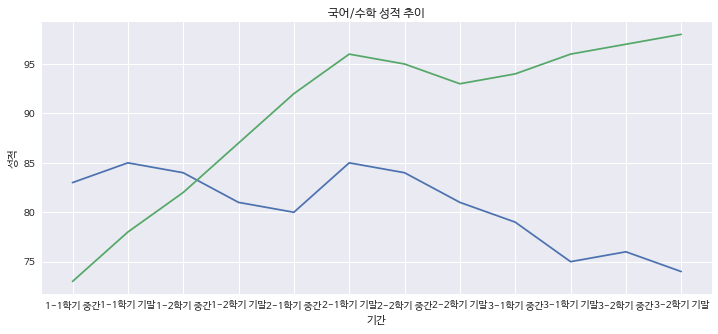

In [32]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0] # 국어 성적 가져오기
math_score = scores[2] # 수학 성적 가져오기

fig = plt.figure(figsize=(12, 5)) # 시각화에 관련된 모든 정보를 총괄하는 Figure 객체

plt.plot(xs, lang_score) # 국어 성적을 그리기
plt.plot(xs, math_score) # 수학 성적을 그리기

plt.title("국어/수학 성적 추이")
plt.xlabel("기간")
plt.ylabel("성적")
plt.show()

## 6. 범례(Legend) 추가하기

---

위와 같이 할경우 각각의 추이선이 무슨 과목을 의미하는지 파악하기 어려울 수 있습니다. <br>
각 추이선(계열)이 어떤 의미인지를 전달하기 위해, 범례를 표시해보도록 하겠습니다.

> 1. `plt.legend(handles, labels)` : 범례를 추가합니다. 

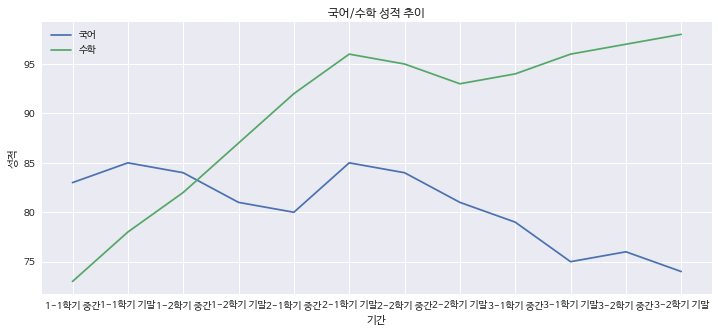

In [35]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0]
math_score = scores[2]

fig = plt.figure(figsize=(12, 5))

plt.plot(xs, lang_score)
plt.plot(xs, math_score)

plt.title("국어/수학 성적 추이")
plt.xlabel("기간")
plt.ylabel("성적")

plt.legend(["국어", "수학"]) # 범례 추가하기
plt.show()

## 7. 지침선(tick) 다루기

---

x축의 지침선을 특정한 것만 남겨두고 싶다면, 지침선을 아래와 같이 지정할 수 있습니다.

> 1. `plt.xticks(ticks, [labels])` : x축의 지침선 중 지정한 선만 남깁니다.
> 2. `plt.yticks(ticks, [labels])` : y축의 지침선 중 지정한 선만 남깁니다.

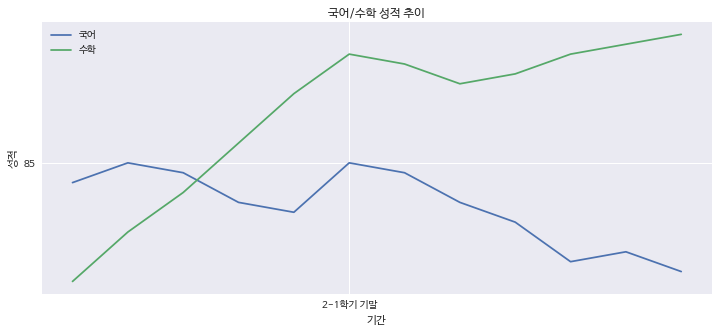

In [39]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0]
math_score = scores[2]

fig = plt.figure(figsize=(12, 5))

plt.plot(xs, lang_score)
plt.plot(xs, math_score)

plt.title("국어/수학 성적 추이")
plt.xlabel("기간")
plt.ylabel("성적")

plt.legend(["국어", "수학"])

plt.xticks(["2-1학기 기말"]) # `2-1학기 기말` 지침선만 남깁니다.
plt.yticks([85])           # `85` 지침선만 남깁니다.
plt.show()

이렇게 할 경우 가장 성적이 급변하기 시작한 지점을 표기할 수 있습니다.

## 8. 값의 범위(lim) 다루기

---

y값의 범위는 추이선의 범위에 맞추어 지정됩니다. 이런 경우 서로 다른 subplot 간 비교가 어려울 수 있습니다. 이를 위해 고정시킬 수 있습니다.

> 1. `plt.xlim(left, right)` : X축의 최소값(left) , 최대값(right) 내에서만 시각화합니다.
> 2. `plt.ylim(left, right)` : Y축의 최소값(left) , 최대값(right) 내에서만 시각화합니다.

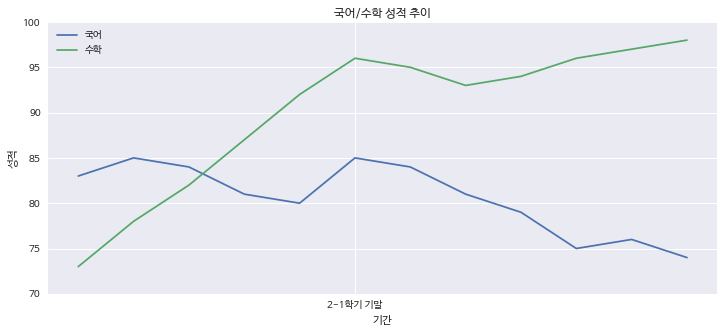

In [59]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0]
math_score = scores[2]

fig = plt.figure(figsize=(12, 5))

plt.plot(xs, lang_score)
plt.plot(xs, math_score)

plt.title("국어/수학 성적 추이")
plt.xlabel("기간")
plt.ylabel("성적")

plt.legend(["국어", "수학"])

plt.xticks(["2-1학기 기말"])

plt.ylim(70, 100) # y값 범위를 70~100 사이로 지정할 수 있습니다.

plt.show()

## 9. 여러 계열의 Plot을 한번에 그리기

---

국어, 수학, 영어와 같이 여러개의 계열을 시각화 할때, 매 번 하나의 계열 씩 시각화하지 않고<br>
한 번의 plt.plot()으로 여러 계열의 plot을 동시에 그릴 수 있습니다. <br>

### (1) 데이터의 shape 바꾸어주기
여러개의 데이터를 한 번의 plot으로 그려줄 경우, 데이터의 형태를 바꾸어 주는 작업을 거쳐야 합니다.<br>
pyplot에서는 가장 낮은 level의 묶음을 하나의 시점으로 시각화를 합니다. <br>
( 각 계열 기준 -> 각 시점(항목) 기준)

In [0]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

In [49]:
scores # 원래의 데이터에는 열마다 시간대 별 각 과목 성적이 들어가 있습니다.
       # 즉, 데이터의 가장 낮은 단계의 묶음이 과목 기준으로 구분되어있습니다.

array([[83, 85, 84, 81, 80, 85, 84, 81, 79, 75, 76, 74],
       [86, 90, 91, 89, 92, 90, 87, 85, 87, 84, 82, 80],
       [73, 78, 82, 87, 92, 96, 95, 93, 94, 96, 97, 98]])

행과 열을 바꾸기 위해서는 `np.transpose`를 이용하면 됩니다.

> 1. `np.transpose()` : 전치행렬을 구하는 함수로서, 행을 열로, 열을 행으로 바꿔줍니다.

In [51]:
transposed_scores = np.transpose(scores)
transposed_scores # 행마다 시간대 별 각 과목 성적이 들어가 있다.
                  # 즉, 데이터의 가장 낮은 단계의 묶음이 시점을 기준으로 구분되었습니다.

array([[83, 86, 73],
       [85, 90, 78],
       [84, 91, 82],
       [81, 89, 87],
       [80, 92, 92],
       [85, 90, 96],
       [84, 87, 95],
       [81, 85, 93],
       [79, 87, 94],
       [75, 84, 96],
       [76, 82, 97],
       [74, 80, 98]])

### (2) 여러 계열의 데이터를 한번에 보내기
데이터가 시각화에 맞게 변환되었다면, 기존과 동일한 방법으로 데이터를 전달하면 됩니다.

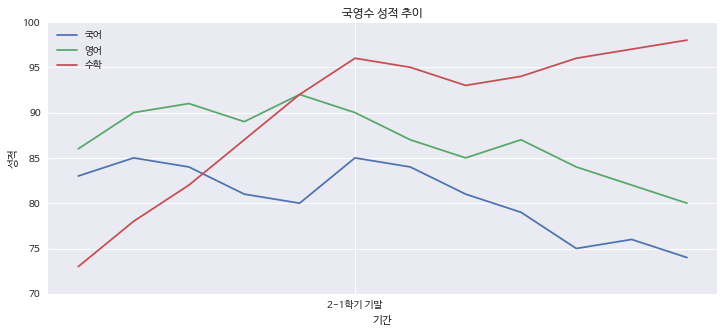

In [53]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

fig = plt.figure(figsize=(12, 5)) 

plt.plot(xs, transposed_scores) # 변환된 성적 데이터(transposed_scores)를 전달합니다.
                                # plot을 한 번만 입력했음에도 여러개의 plot이 그려진 것을 확인할 수 있습니다.
  
plt.title("국영수 성적 추이")
plt.xlabel("기간")
plt.ylabel("성적")

plt.legend(["국어","영어","수학"])

plt.xticks(["2-1학기 기말"])

plt.ylim(70,100)
plt.show()

## 10. plot을 나누어 표기하기

---

서로 다른 plot에 각각 다른 추이 선을 그리고 싶을 때에는, subplot을 이용하면 됩니다.

### (1) plot의 구획 나누기


> 1. `fig.add_subplot(nrows, ncols, index)` : <br> 
> &nbsp;&nbsp;&nbsp;&nbsp; plot을 여러개로 나누고, index 번째의 subplot을 객체로 반환합니다.<br>
> &nbsp;&nbsp;&nbsp;&nbsp; 캔버스를 여러개의 구획으로 나눈다고 생각하시면 됩니다.<br>
>> nrows : 행을 몇 개로 나눌 것인가.<br>
>> ncols : 열을 몇 개로 나눌 것인가.<br>
>> index : 나누어진 plot의 몇번째 subplot인가.<br>

> 2. 각각 나누어진 subplot에 plt.plot()를 이용하여 시각화를 그려주면 됩니다.

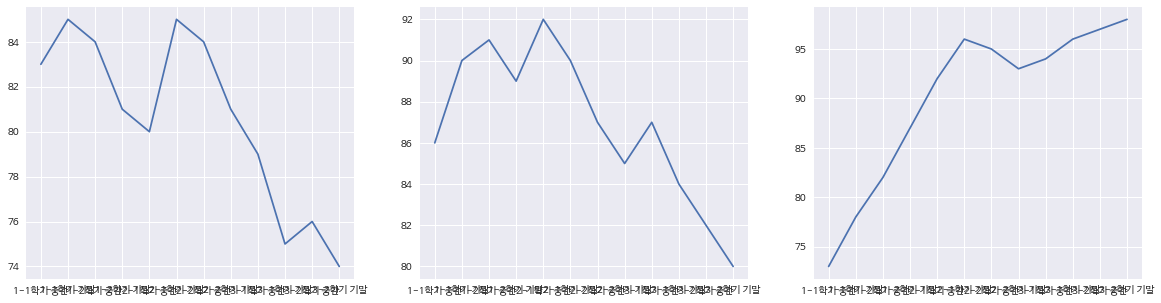

In [80]:
xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0] # 국어 성적 가져오기
eng_score = scores[1]  # 영어 성적 가져오기
math_score = scores[2] # 수학 성적 가져오기

fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(1, 3, 1) # 1행 3열로 나누어진 plot 중 첫번째 subplot
ax.plot(xs, lang_score) # 국어 성적을 그리기
ax = fig.add_subplot(1, 3, 2) # 1행 3열로 나누어진 plot 중 두번째 subplot
ax.plot(xs, eng_score) # 영어 성적을 그리기
ax = fig.add_subplot(1, 3, 3) # 1행 3열로 나누어진 plot 중 세번째 subplot
ax.plot(xs, math_score) # 수학 성적을 그리기


plt.show()

### (2) subplot 별 세팅하기

각 subplot에 서로 다른 세팅을 적용하기 위해서는 각 subplot마다 세팅을 따로 해주어야 합니다.<br>
위에 배워왔던 세팅 방법과 비슷하지만  `set_`을 붙여야 한다는 점에서 약간의 차이가 있습니다.

> 1. `plt.xticklabels()`  ➡︎  &nbsp;&nbsp;&nbsp;`ax.set_xticklabels()`<br>
> 2. `plt.xlim()`  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➡︎ &nbsp;&nbsp; `ax.set_xlim()`<br>
> 3. `plt.title()` &nbsp;&nbsp;&nbsp;➡︎ &nbsp;&nbsp;&nbsp;`ax.set_title()`

#### 전체 plot title 의 세팅
subplot을 이용한 경우, plot 전체에 대한 title 세팅은 `plt.suptitle()`을 이용합니다.

> 1. `plt.suptitle()` : plot 전체 (큰 캔버스)의 이름 붙이기

<Figure size 864x360 with 0 Axes>

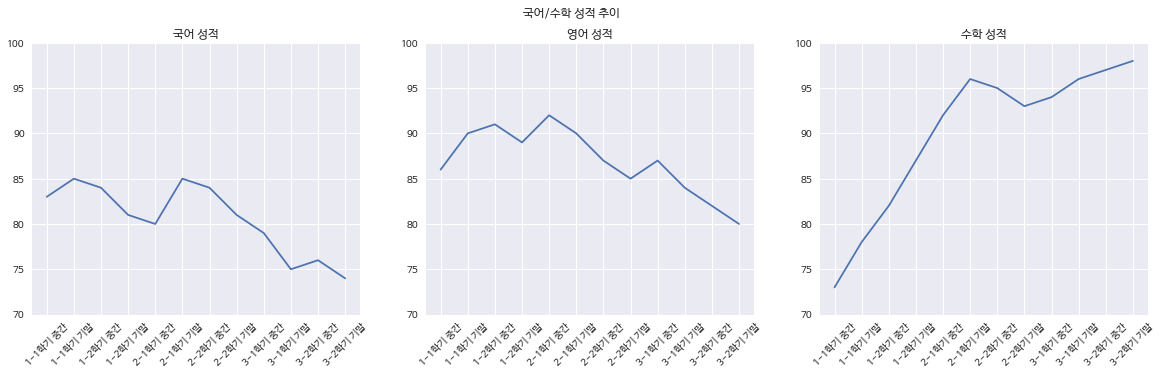

In [82]:
fig = plt.figure(figsize=(12, 5)) 

xs = ["1-1학기 중간","1-1학기 기말","1-2학기 중간","1-2학기 기말",
      "2-1학기 중간","2-1학기 기말","2-2학기 중간","2-2학기 기말",
      "3-1학기 중간","3-1학기 기말","3-2학기 중간","3-2학기 기말"]

lang_score = scores[0]
eng_score = scores[1] 
math_score = scores[2]

fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(1, 3, 1) # 첫번째 subplot
ax.plot(xs, lang_score)
ax.set_xticklabels(xs,
                   rotation=45) # 첫번째 subplot의 label 지정 : set_xticklabels(label 이름, rotation=각도)
ax.set_ylim(70,100)             # 첫번째 subplot의 y축의 범위 지정
ax.set_title("국어 성적")         # 첫번째 subplot의 title 지정

ax = fig.add_subplot(1, 3, 2) # 두번째 subplot
ax.plot(xs, eng_score)
ax.set_xticklabels(xs,
                   rotation=45) # 두번째 subplot의 label 지정 : set_xticklabels(label 이름, rotation=각도)
ax.set_ylim(70,100)             # 두번째 subplot의 y축의 범위 지정 : set_ylim()
ax.set_title("영어 성적")         # 두번째 subplot의 title 지정 : set_title()

ax = fig.add_subplot(1, 3, 3) # 세번째 subplot
ax.plot(xs, math_score)
ax.set_xticklabels(xs,
                   rotation=45) # 세번째 subplot의 label 지정 : set_xticklabels(label 이름, rotation=각도)
ax.set_ylim(70,100)             # 세번째 subplot의 y축의 범위 지정 : set_ylim()
ax.set_title("수학 성적")         # 세번째 subplot의 title 지정 : set_title()


plt.suptitle("국어/수학 성적 추이") # 전체 plot의 title 지정
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/04


---